# Visualization of Cleaned Data

In [1]:
import pandas as pd
import folium
from folium.plugins import FastMarkerCluster, HeatMap
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling
from pandas_profiling import ProfileReport
import numpy as np

/Users/freethrall/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
RANDOM_SEED = 8
DATA_PATH = 'data/'
MODEL_PATH = 'models/'

In [3]:
df = pd.read_csv(DATA_PATH+'clean_water_well_data.csv')
df.head()

date_recorded        funder   gps_height     installer  longitude  \
0    2011-03-14         roman  1390.000000         roman  34.938093   
1    2013-03-06       grumeti  1399.000000       grumeti  34.698766   
2    2013-02-25  lottery club   686.000000  world vision  37.460664   
3    2013-01-28        unicef   263.000000        unicef  38.486161   
4    2011-07-13   action in a  1018.821805       artisan  31.130847   

    latitude  num_private  subvillage   region        lga  ... permit  \
0  -9.856322            0    Mnyusi B   Iringa     Ludewa  ...  False   
1  -2.147466            0     Nyamara     Mara  Serengeti  ...   True   
2  -3.821329            0     Majengo  Manyara  Simanjiro  ...   True   
3 -11.155298            0  Mahakamani   Mtwara   Nanyumbu  ...   True   
4  -1.825359            0  Kyanyamisa   Kagera    Karagwe  ...   True   

   construction_year  extraction_type  management         payment  \
0               1999          gravity         vwc    pay annually   
1               2010          gravity         wug       never pay   
2               2009          gravity         vwc  pay per bucket   
3               1986      submersible         vwc       never pay   
4               2000          gravity       other       never pay   

  water_quality      quantity                source  \
0          soft        enough                spring   
1          soft  insufficient  rainwater harvesting   
2          soft        enough                   dam   
3          soft           dry           machine dbh   
4          soft      seasonal  rainwater harvesting   

               waterpoint_type    status_group  
0           communal standpipe      functional  
1           communal standpipe      functional  
2  communal standpipe multiple      functional  
3  communal standpipe multiple  non functional  
4           communal standpipe      functional  

[5 rows x 23 columns]

# Heatmaps of Waterpoint locations by Class

In [4]:
def draw_heatmap(df, save_memory=False):
    """
    Draw a heatmap of the instances in a dataframe based upon their latitude
    and longitude.
    
    Parameters:
    df: dataframe with locations
    save_memory: when set to true the map will not be rendered.  Helpful when
        running out of memory.
    """
    
    if not save_memory:
        lat_long_matrix = df[['latitude', 'longitude']].to_numpy()

        map_ = folium.Map([-6.369, 34.8888], zoom_start=5)

        map_.add_child(HeatMap(lat_long_matrix, radius=10))

        display(map_)

In [5]:
draw_heatmap(df[df.status_group == 'functional'])

In [6]:
draw_heatmap(df[df.status_group == 'non functional'])

In [7]:
draw_heatmap(df[df.status_group == 'functional needs repair'])

# Histigram of Class Labels

In [8]:
plt.figure(figsize=(16,12))
plt.hist(df['status_group'])
plt.title('Classes of Waterpoints in Tanzania', fontsize=24);

# Report on Each Feature

In [9]:
profile_clean = ProfileReport(df, minimal=True, title='Profile Report')
profile_clean.to_notebook_iframe()

# Map of All Water Points with labels

In [10]:
# import geopandas

# from pylab import rcParams
# rcParams['figure.figsize'] = 18, 30

# gdf = geopandas.GeoDataFrame(
#     df, geometry=geopandas.points_from_xy(df.longitude, df.latitude))

# functional = gdf.where(gdf['status_group'] == 'functional')
# repair = gdf.where(gdf['status_group'] == 'functional needs repair')
# broken = gdf.where(gdf['status_group'] == 'non functional')

# world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# # We restrict to Africa
# ax = world[world.continent == 'Africa'].plot(
#     color='white', edgecolor='gray')

# ax.scatter(broken['longitude'], broken['latitude'],
#            c='red', alpha=.5, s=2, label='Non Functional')

# ax.scatter(functional['longitude'], functional['latitude'],
#            c='green',alpha=.5, s=2, label='Functional')

# ax.scatter(repair['longitude'], repair['latitude'],
#            c='blue', alpha=.5, s=2, label='Functional Needs Repair')


# plt.ylim(-12, 0)
# plt.xlim(28,41)

# plt.legend(fontsize=18, markerscale=10)

# plt.title('Waterpoints in Tanzania', fontsize=32)

# plt.show()

# Normalized Stacked Bar Charts of Select Features

In [11]:
def norm_stacked_bar_chart(df, feature, title):
    """
    Display a horizontal stacked bar chart for a given feature and its labels
    
    Parameters:
    df: dataframe
    feature: feature from dataframe
    title: title of vizualization
    
    """
    feature_values = df[feature].unique()
    functional = []
    non_functional = []
    functional_needs_repair = []
    # create lists of the count for each label per feature value
    for value in feature_values:
        functional.append(len(df[(df[feature] == value) & (df['status_group'] == 'functional')]))
        non_functional.append(len(df[(df[feature] == value) & (df['status_group'] == 'non functional')]))
        functional_needs_repair.append(len(df[(df[feature] == value) & (df['status_group'] == 'functional needs repair')]))
    
    # convert the lists to np.arrays for math operations
    functional = np.array(functional)
    non_functional = np.array(non_functional)
    functional_needs_repair = np.array(functional_needs_repair)
    sum_of_labels = functional + non_functional + functional_needs_repair
    
    # normalize the data
    functional_norm = functional / sum_of_labels * 100
    non_functional_norm = non_functional / sum_of_labels * 100
    functional_needs_repair_norm = functional_needs_repair / sum_of_labels * 100

    plt.figure(figsize=(16,14)) 
    
    plt.barh(feature_values, functional_norm, label='functional')
    plt.barh(feature_values, non_functional_norm, left=functional_norm, label='non functional')
    plt.barh(feature_values, functional_needs_repair_norm, left=functional_norm + non_functional_norm, label='functional needs repair')
    
    plt.legend(fontsize=12, loc='center left', bbox_to_anchor=(1.05,0.5))
    
    plt.title(title, fontsize=18)
    plt.show()

In [12]:
def get_low_card_features(df, n):
    """Given a dataframe return a list of the features with a cardinalty less than n"""
    feature_list = []
    for col in list(df.columns): # .select_dtypes(include=['bool', 'object'])
        if len(df[col].value_counts()) < n:
            feature_list.append(col)
    return feature_list

In [13]:
# remove the labels from the list of features
low_card_features = get_low_card_features(df.drop('status_group', axis=1), 60)

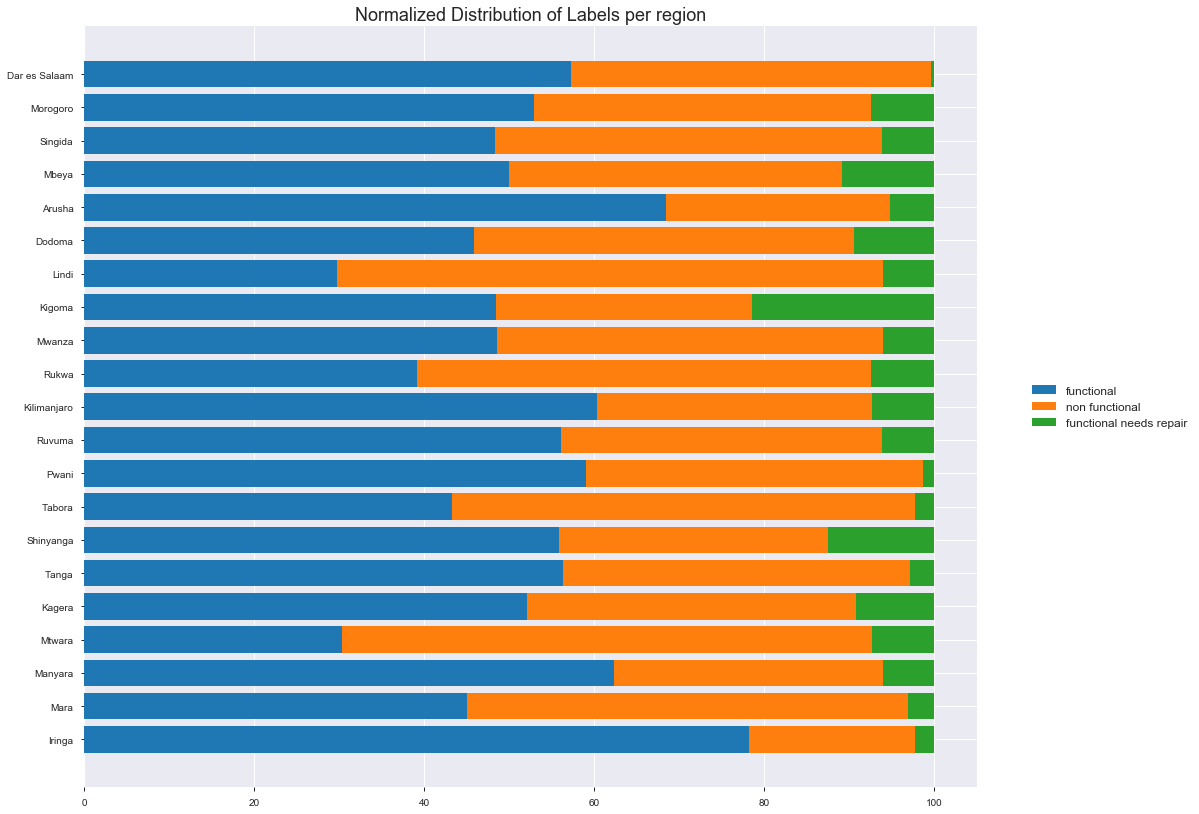

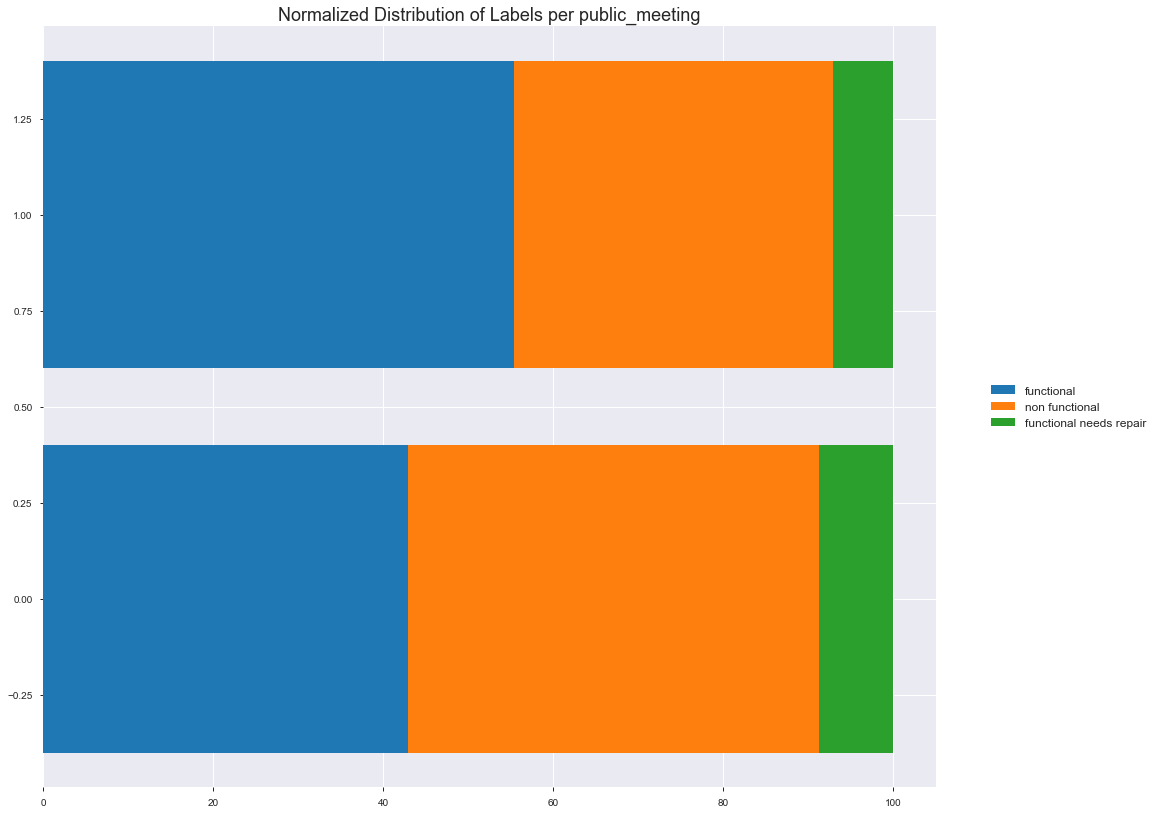

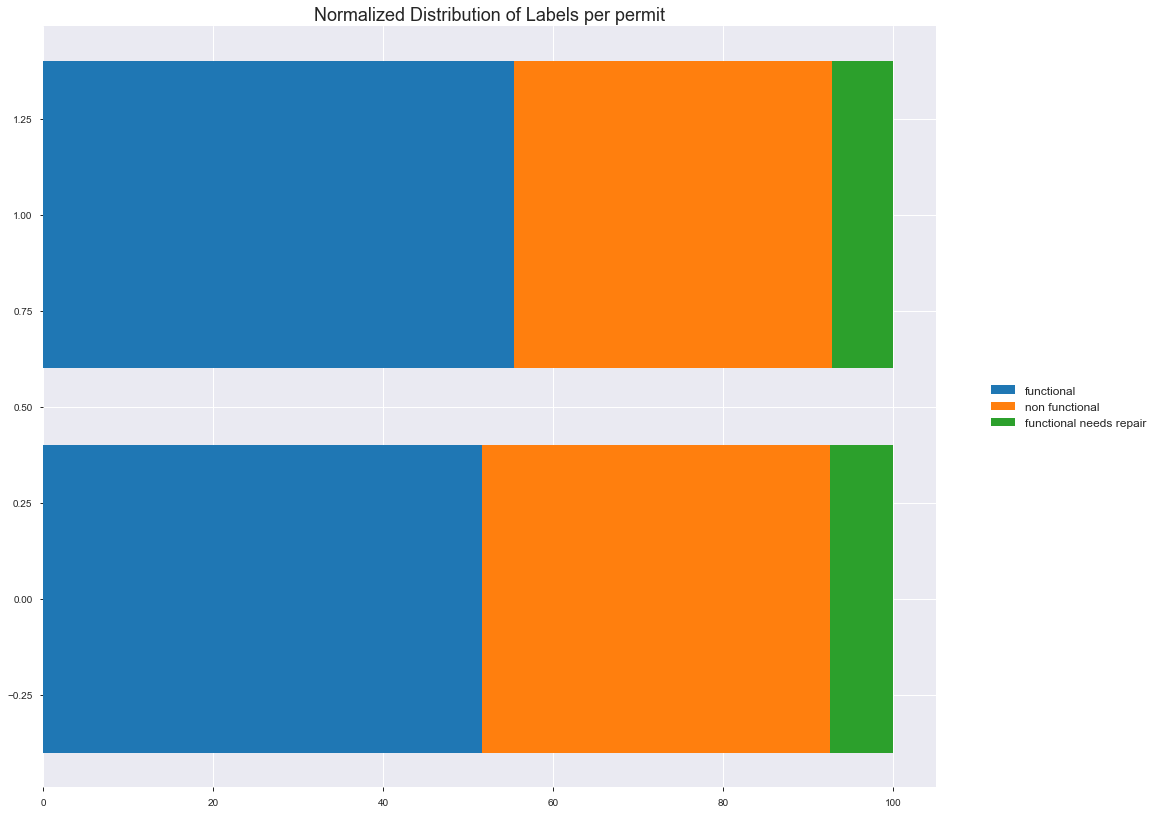

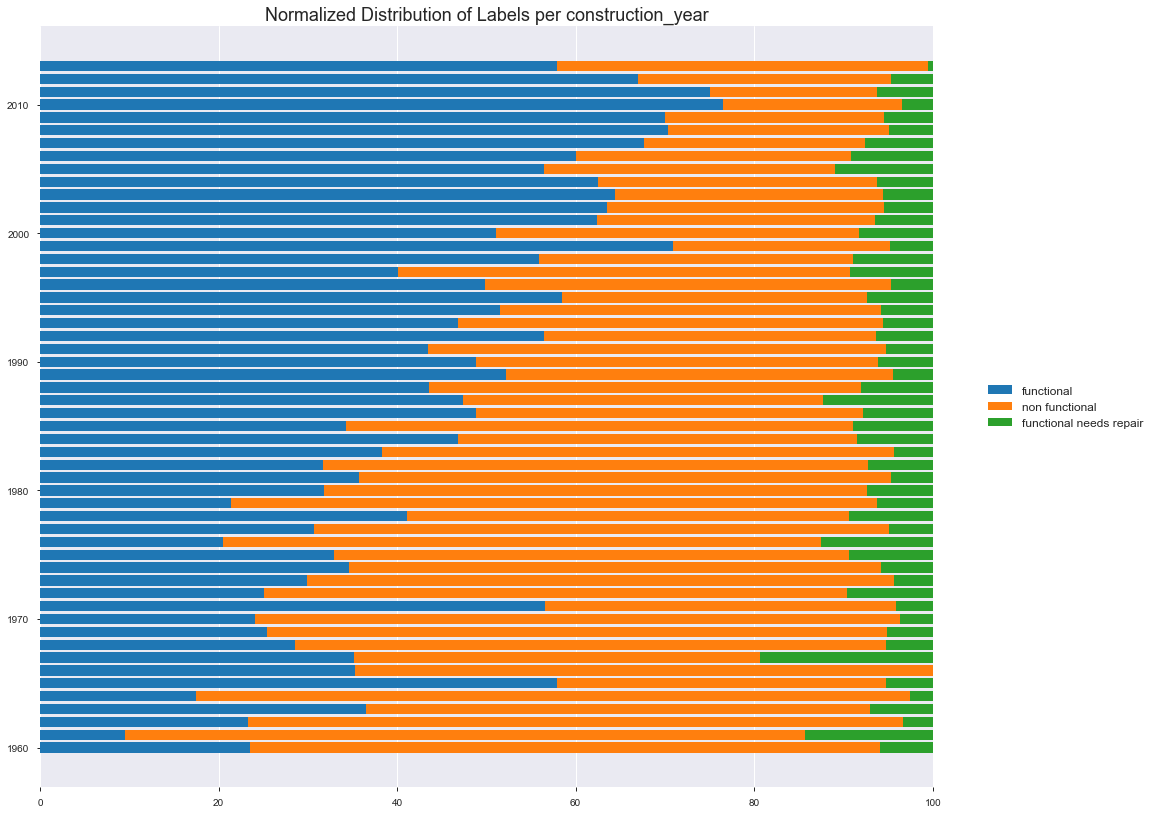

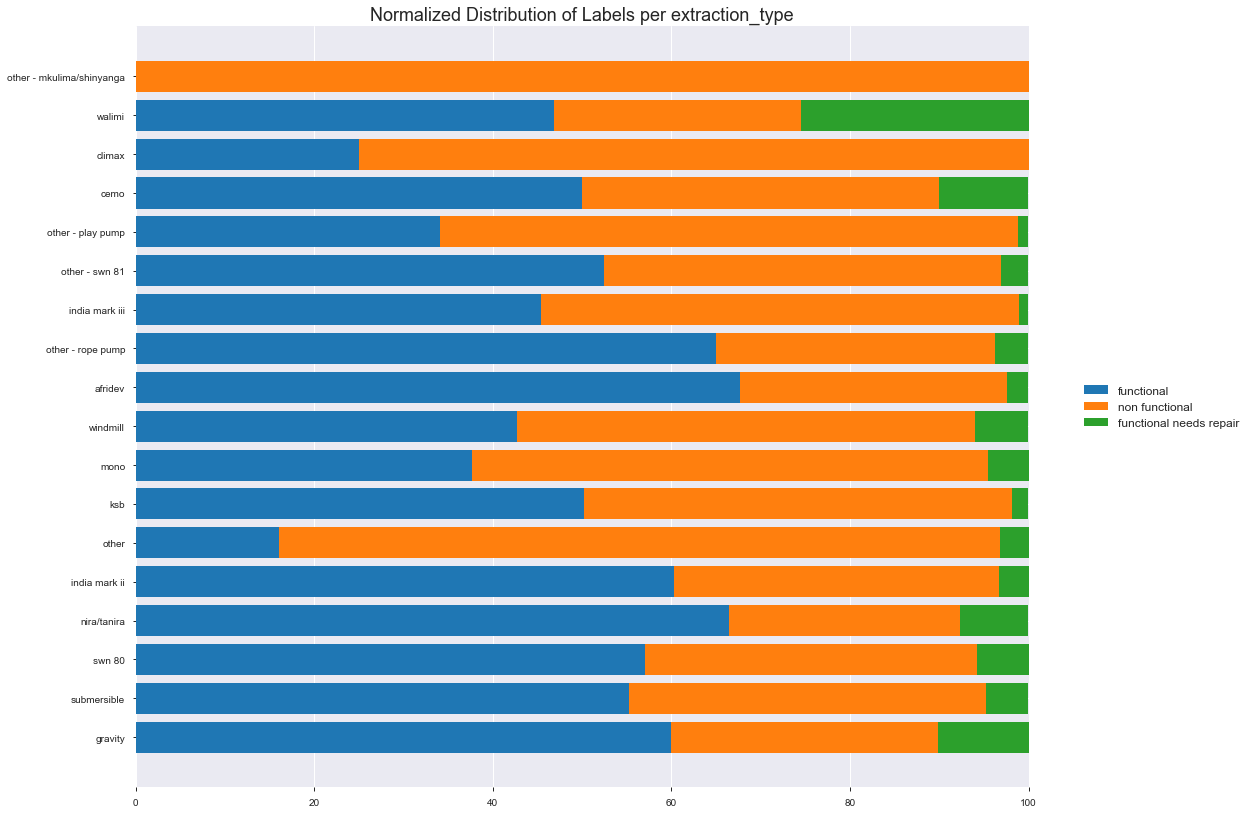

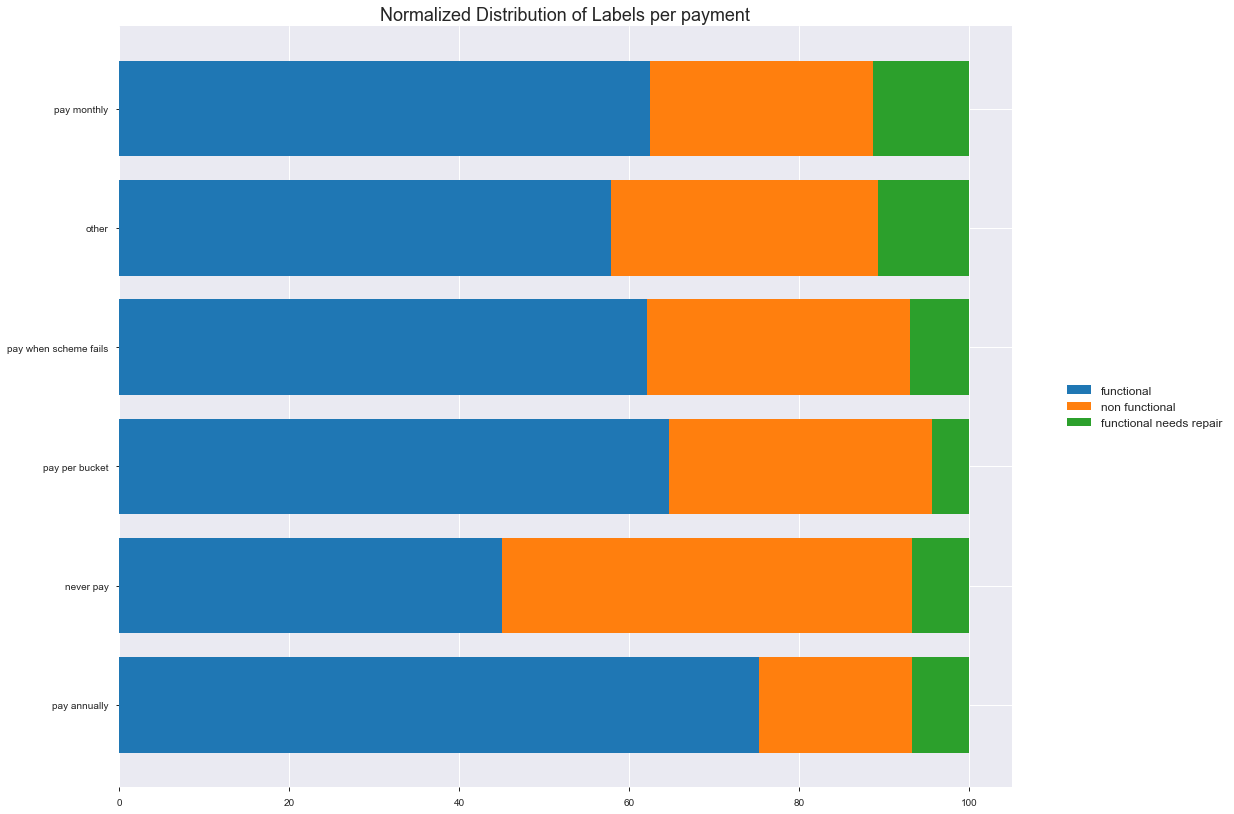

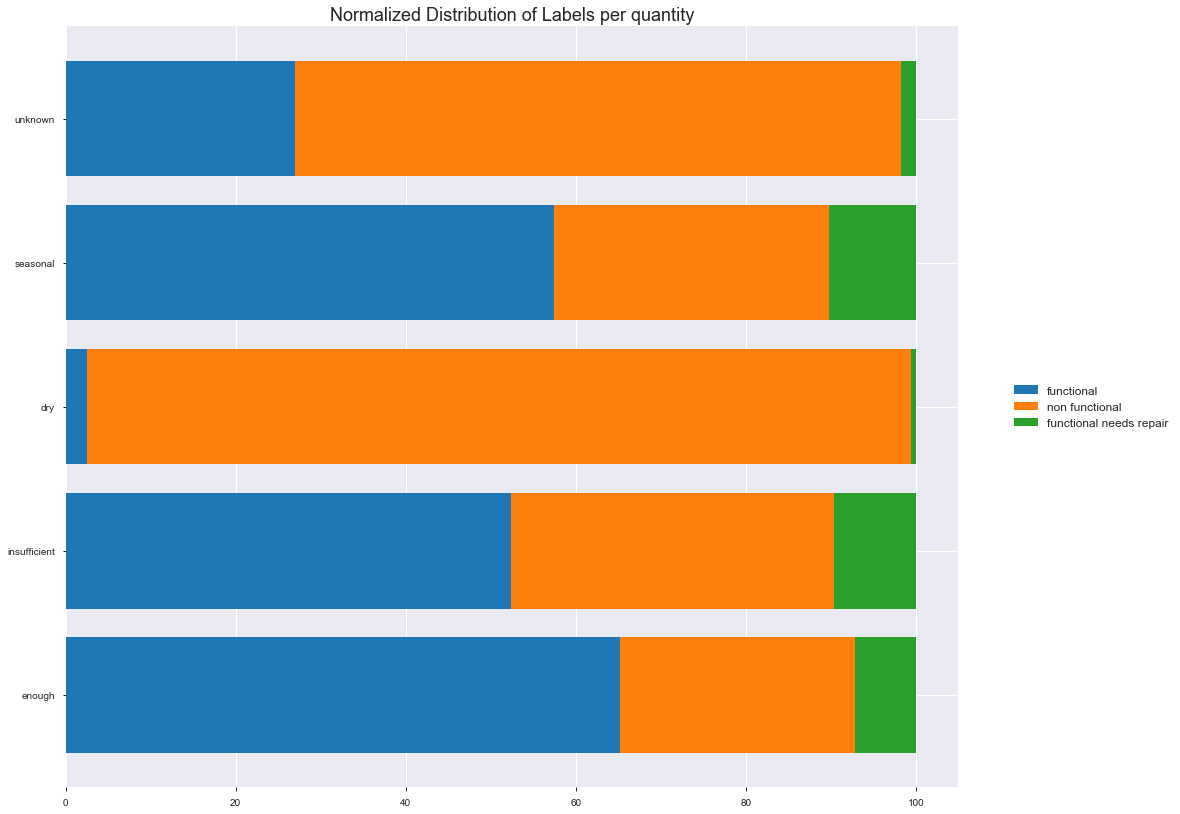

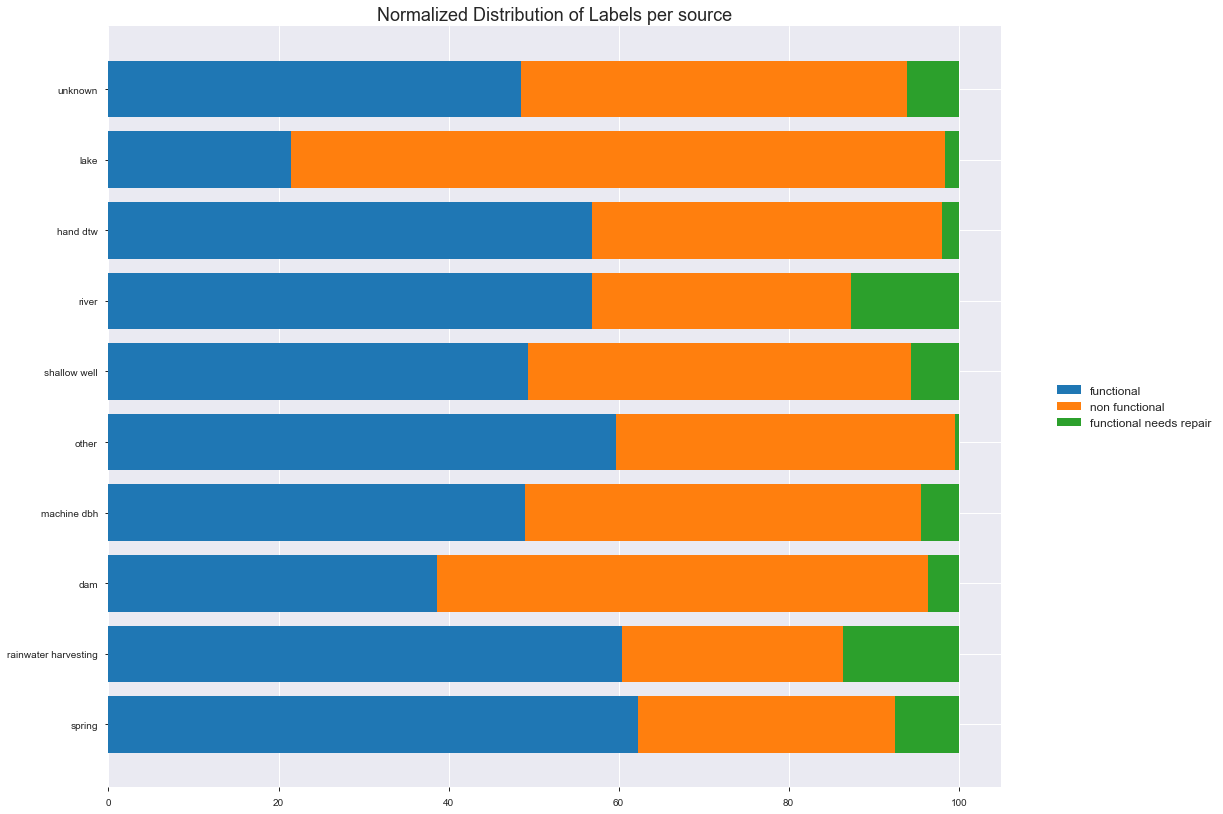

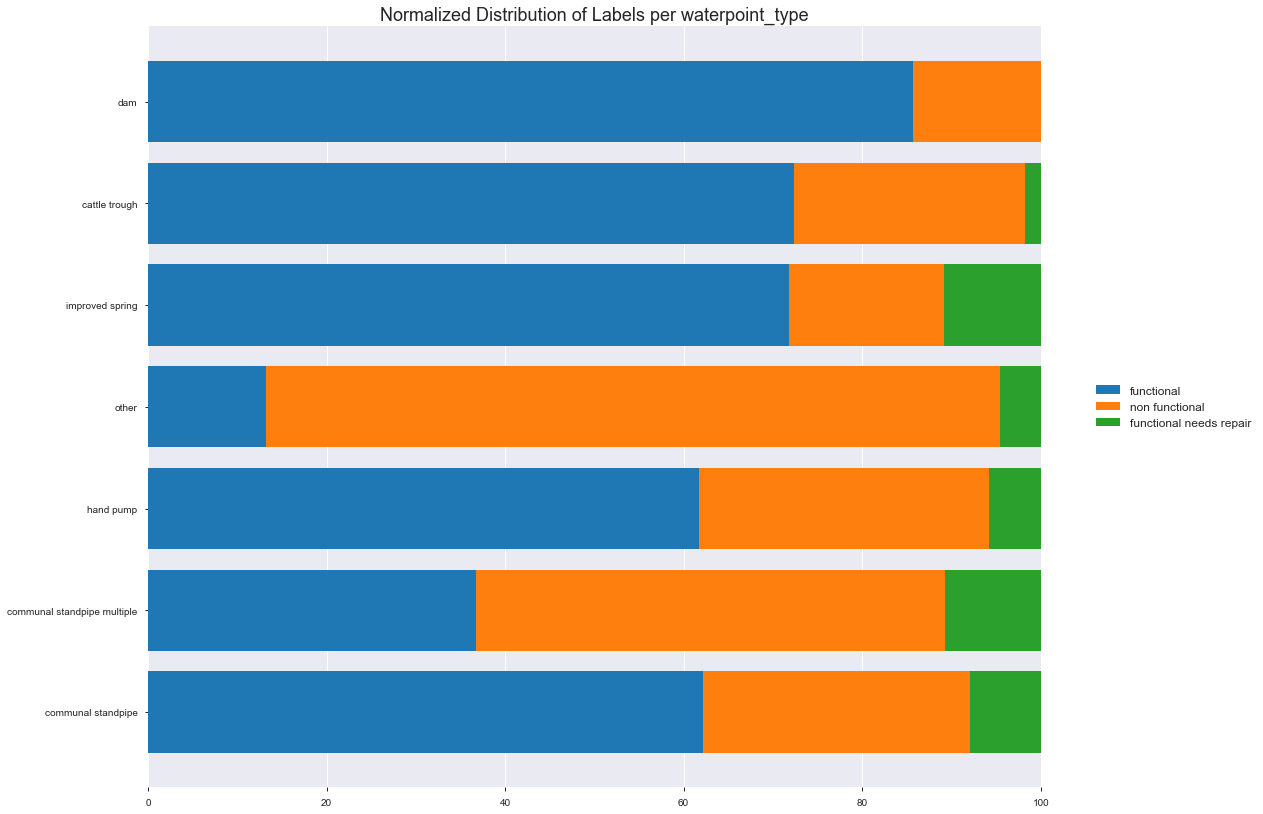

In [14]:
for feature in low_card_features:
    norm_stacked_bar_chart(df, feature, f'Normalized Distribution of Labels per {feature}')

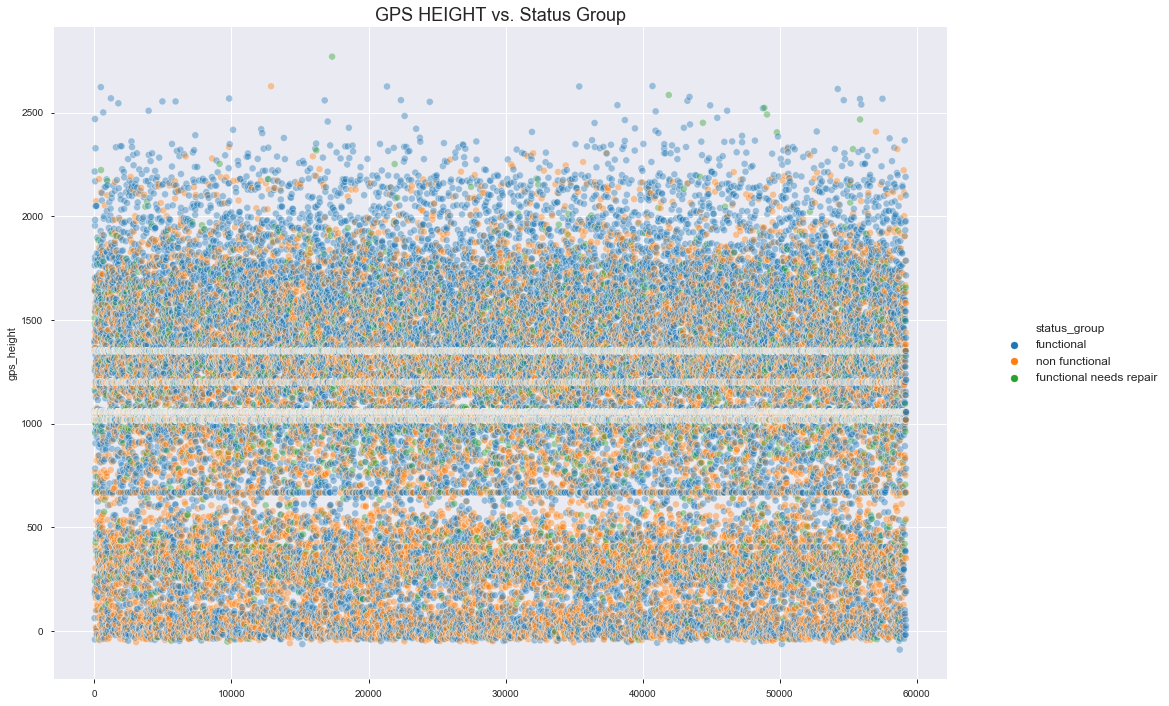

In [20]:
plt.figure(figsize=(16,12))
sns.scatterplot(x=np.linspace(1,len(df), len(df)), y=df['gps_height'], hue=df['status_group'], alpha=0.4 )
plt.title('GPS HEIGHT vs. Status Group', fontsize=18)
plt.legend(fontsize=12, loc='center left', bbox_to_anchor=(1.05,0.5))
plt.show()

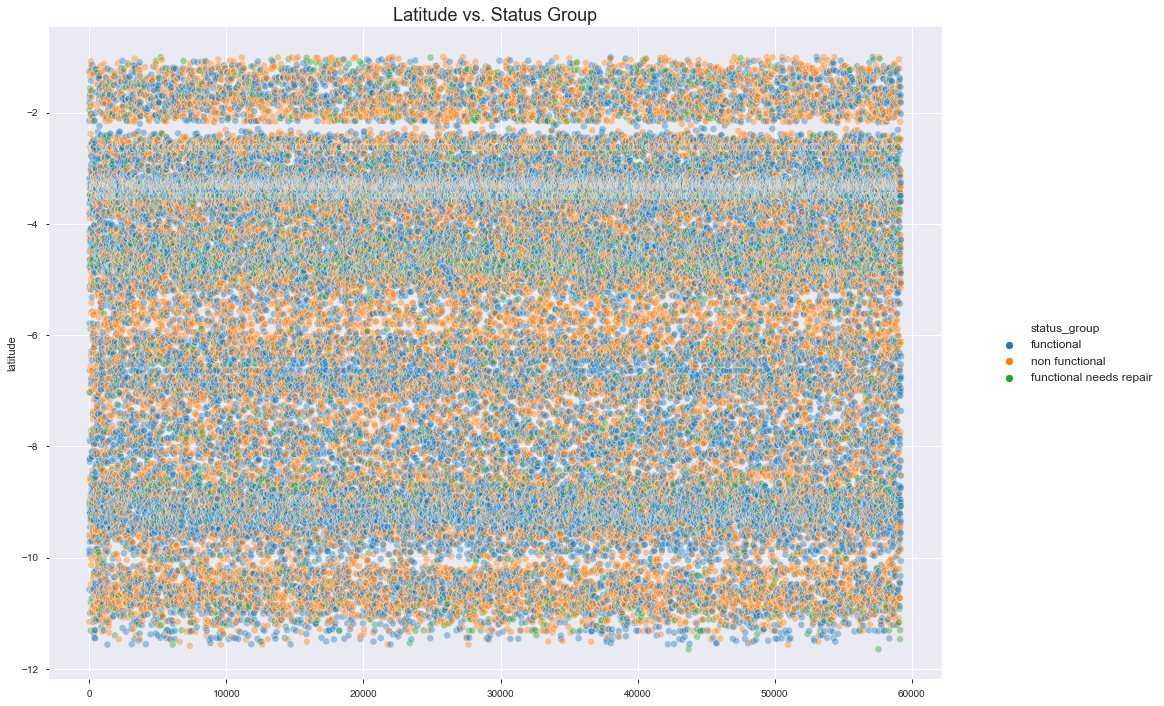

In [21]:
plt.figure(figsize=(16,12))
sns.scatterplot(x=np.linspace(1,len(df), len(df)), y=df['latitude'], hue=df['status_group'], alpha=0.4 )
plt.title('Latitude vs. Status Group', fontsize=18)
plt.legend(fontsize=12, loc='center left', bbox_to_anchor=(1.05,0.5))
plt.show()

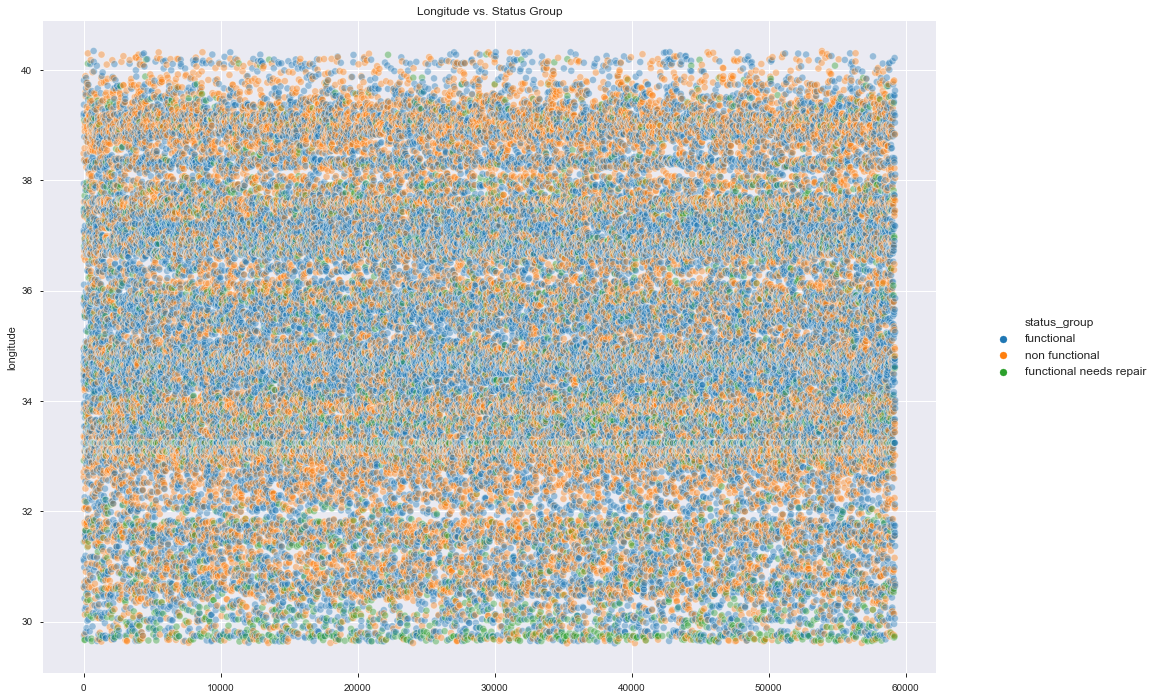

In [22]:
plt.figure(figsize=(16,12))
sns.scatterplot(x=np.linspace(1,len(df), len(df)), y=df['longitude'], hue=df['status_group'], alpha=0.4 )
plt.title('Longitude vs. Status Group')
plt.legend(fontsize=12, loc='center left', bbox_to_anchor=(1.05,0.5))
plt.show()

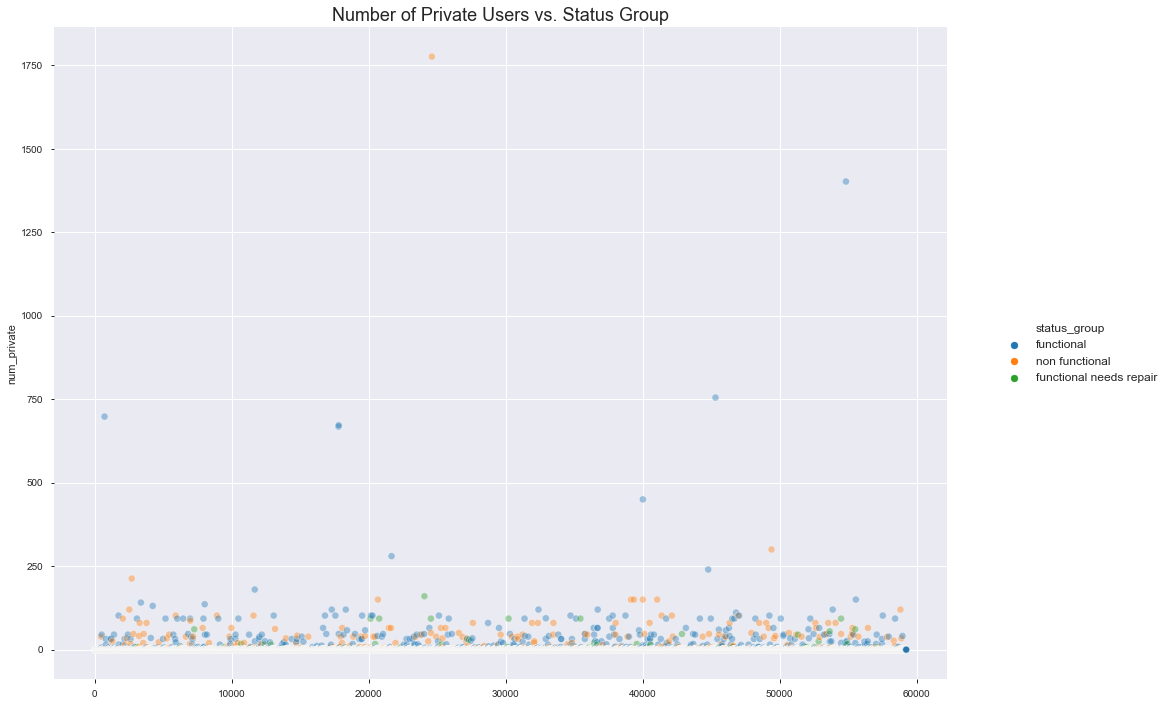

In [23]:
plt.figure(figsize=(16,12))
sns.scatterplot(x=np.linspace(1,len(df), len(df)), y=df['num_private'], hue=df['status_group'], alpha=0.4 )
plt.title('Number of Private Users vs. Status Group', fontsize=18)
plt.legend(fontsize=12, loc='center left', bbox_to_anchor=(1.05,0.5))
plt.show()

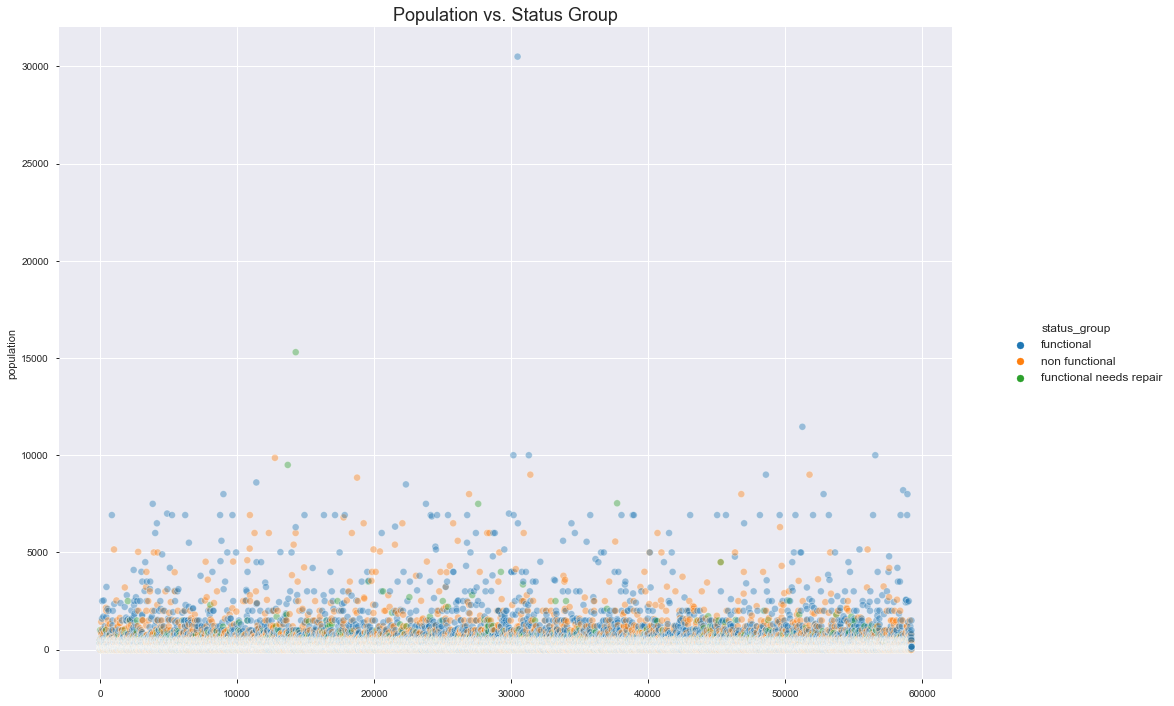

In [24]:
plt.figure(figsize=(16,12))
sns.scatterplot(x=np.linspace(1,len(df), len(df)), y=df['population'], hue=df['status_group'], alpha=0.4 )
plt.title('Population vs. Status Group', fontsize=18 )
plt.legend(fontsize=12, loc='center left', bbox_to_anchor=(1.05,0.5))
plt.show()

# Summary

The dataset is imbalanced with class 'functional needs repair' being an extreme minority class while 'functional' and 'non function' have fairly close totals.

There are a total of 23 features remaining after the cleaning process, with 15 nominal categorical, 2 boolean and 6 continuous numerical.  5 of those categorical features have a high cardinality, with over 100 unique values.

Looking at the relationship of the features with the target, there are few values that stand out as highly correlated on there own.  Most values of the categorical and boolean features have a similar distribution to the labels, while all the continuous numerical data except for construction year shows no correlation.

The the features that show a correlation that stands out are as follows:
* Region
    * Lindi - Non Functional
    * Mtwara - Non Functional
    * Rukwa - Non Functional
    * Arusha - Functional
    * Iringa - Functional
* Construction Year
    * The older the more likely to be Non-Functional
* Extraction Type
    * Other - mkulima/shinyanga - Non-Functional
    * Walimi - More likely to be Functional Needs Repair than any other
    * Other - Play - Non-Functional
    * Other - Non-Functional
    * Other - Rope Pump - Functional
    * Afridev - Functional
    * nira/tanira - Functional
* Management
    * SWC (Soil and Water Conservation) - Non-Functional
    * Water Board - Functional
    * WUA (Water Users Assoc.) - Functional
    * Private Operator - Functional
* Payment
    * Pay Annually - Functional
* Water Quality
    * Fluoride - abandoned - Non-Functional
    * Fluoride - Functional
    * Unknown - Non-Functional
* Quantity
    * unknown - Non-Functional
    * dry - Non-Functional
* Source
    * lake - Non-Functional
* Waterpoint Type
    * Dam - Functional
    * Cattle Trough - Functional
    * Improved Spring - Functional
    
Putting all the features together and running them through several classification models will hopefully give us better predictions than any one feature.    

    